In [1]:
import numpy as np
import pandas as pd
import keras
import tensorflow

import cv2
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Model
from keras.layers import Input,Dense,Conv2D,AveragePooling2D,Flatten,MaxPooling2D,BatchNormalization,Dropout

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (2.0.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.


In [2]:
train_gen = ImageDataGenerator(rotation_range = 20,zoom_range=0.2, horizontal_flip=False,
                                  shear_range=0.2,rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_path1 = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train"

valid_path1 = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\valid"

test_path1 = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test"

In [15]:
train_set1 = train_gen.flow_from_directory(train_path1,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

valid_set1 = test_gen.flow_from_directory(valid_path1,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

test_set1 = test_gen.flow_from_directory(test_path1,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 262 images belonging to 53 classes.


In [5]:
from tensorflow.keras.applications import MobileNet, MobileNetV2
IMAGE_SIZE = [224,224]

mob = MobileNet(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
x1= Flatten()(mob.output)
prediction1 = Dense(53, activation='softmax')(x1)
mobilenet_model = Model(inputs = mob.inputs, outputs = prediction1)
mobilenet_model.summary()
mobilenet_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [7]:
history = mobilenet_model.fit_generator(train_set1, 
                                        validation_data=valid_set1, 
                                        epochs=10, 
                                        steps_per_epoch=len(train_set1), 
                                        validation_steps=len(valid_set1))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
239/239 [==============================] - 1506s 6s/step - loss: 3.6501 - accuracy: 0.4685 - val_loss: 2.4263 - val_accuracy: 0.6491
Epoch 2/10
239/239 [==============================] - 1146s 5s/step - loss: 1.1237 - accuracy: 0.6945 - val_loss: 0.6750 - val_accuracy: 0.8377
Epoch 3/10
239/239 [==============================] - 1255s 5s/step - loss: 0.8985 - accuracy: 0.7573 - val_loss: 0.8771 - val_accuracy: 0.8075
Epoch 4/10
239/239 [==============================] - 1404s 6s/step - loss: 0.7165 - accuracy: 0.7985 - val_loss: 0.4307 - val_accuracy: 0.8830
Epoch 5/10
239/239 [==============================] - 1586s 7s/step - loss: 0.6462 - accuracy: 0.8214 - val_loss: 0.4402 - val_accuracy: 0.8792
Epoch 6/10
239/239 [==============================] - 1211s 5s/step - loss: 0.6112 - accuracy: 0.8254 - val_loss: 0.2867 - val_accuracy: 0.9132
Epoch 7/10
239/239 [==============================] - 1168s 

### Model Evaluation and Testing

In [10]:
result = train_set1.class_indices

result

{'ace of clubs': 0,
 'ace of diamonds': 1,
 'ace of hearts': 2,
 'ace of spades': 3,
 'eight of clubs': 4,
 'eight of diamonds': 5,
 'eight of hearts': 6,
 'eight of spades': 7,
 'five of clubs': 8,
 'five of diamonds': 9,
 'five of hearts': 10,
 'five of spades': 11,
 'four of clubs': 12,
 'four of diamonds': 13,
 'four of hearts': 14,
 'four of spades': 15,
 'jack of clubs': 16,
 'jack of diamonds': 17,
 'jack of hearts': 18,
 'jack of spades': 19,
 'joker': 20,
 'king of clubs': 21,
 'king of diamonds': 22,
 'king of hearts': 23,
 'king of spades': 24,
 'nine of clubs': 25,
 'nine of diamonds': 26,
 'nine of hearts': 27,
 'nine of spades': 28,
 'queen of clubs': 29,
 'queen of diamonds': 30,
 'queen of hearts': 31,
 'queen of spades': 32,
 'seven of clubs': 33,
 'seven of diamonds': 34,
 'seven of hearts': 35,
 'seven of spades': 36,
 'six of clubs': 37,
 'six of diamonds': 38,
 'six of hearts': 39,
 'six of spades': 40,
 'ten of clubs': 41,
 'ten of diamonds': 42,
 'ten of hearts':

In [13]:
import os
test_ = []
for folder in os.listdir(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test"):
    test_.append(folder)
    
import os
train_ = []
for folder in os.listdir(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train"):
    train_.append(folder)

for j in train_:
    if j not in test_:
        print(j)

In [16]:
mobilenet_scores = mobilenet_model.evaluate(test_set1)
print("Mobilenet Test Loss:", mobilenet_scores[0])
print("Mobilenet Test accuracy:", mobilenet_scores[1])



9/9 [==============================] - 8s 897ms/step - loss: 0.4435 - accuracy: 0.9008
Mobilenet Test Loss: 0.44347354769706726
Mobilenet Test accuracy: 0.9007633328437805


In [17]:
mobilenet_scores = mobilenet_model.evaluate(valid_set1)
print("Mobilenet validation Loss:", mobilenet_scores[0])
print("Mobilenet validation accuracy:", mobilenet_scores[1])



9/9 [==============================] - 8s 903ms/step - loss: 0.3910 - accuracy: 0.9245
Mobilenet validation Loss: 0.3909977078437805
Mobilenet validation accuracy: 0.9245283007621765


In [ ]:
--

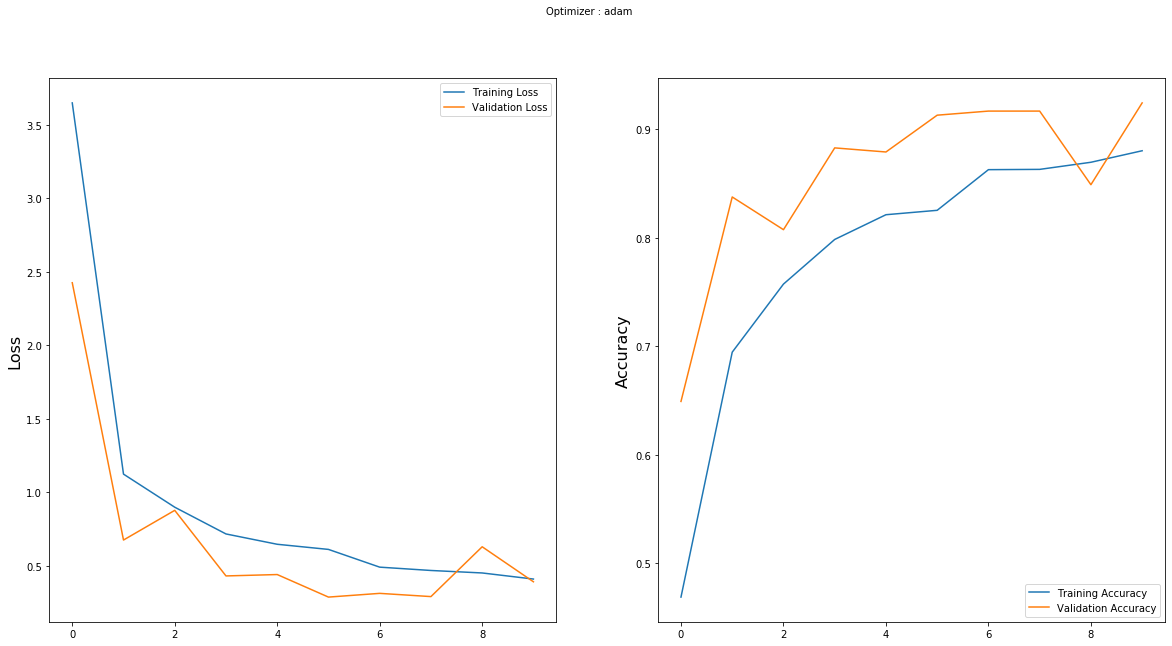

In [19]:
import matplotlib.pyplot as plt

x=history
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [20]:
mobilenet_model.save('cards_mobilenet.h5')

In [21]:
final_model = tensorflow.keras.models.load_model("cards_mobilenet.h5")

In [28]:
path = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test\four of spades\5.jpg"

img = cv2.imread(path)

output = np.argmax(final_model.predict(cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)[np.newaxis]))

value = {i for i in result if result[i]==output}
print("output is :",value)

output is : {'king of spades'}


In [29]:
cv2.imshow('img',cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR))
cv2.waitKey()
cv2.destroyAllWindows()